In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("Flu_Classification.csv")
df.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,67.0,38.11,F,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
1,29.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,22.0,0.00,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
3,20.0,36.56,F,unknown,Yes,Yes,unknown,No,unknown,Yes,unknown,H1N1
4,21.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1


In [3]:
df.shape

(1485, 12)

In [4]:
# Converting string categorical variables into numeric categorical variables

def convert(df, n, k) :
    for col in df.iloc[:,n:k].columns:
        df[col] = df[col].astype('category').cat.codes
        
    return df

In [5]:
df = convert(df, 2,12)
df_cluster = df.iloc[:,0:11]

In [6]:
# Preprocessing the data to make it visualizable
  
# Scaling the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
  
# Normalizing the Data
df_normalized = normalize(df_scaled)
  
# Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
  
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P1', 'P2']
  
df_principal.head()

,P1,P2
0,0.631943,0.522644
1,-0.851658,-0.113107
2,-0.785821,0.151758
3,0.563009,0.285067
4,-0.869091,-0.212135


C:\Users\eveli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


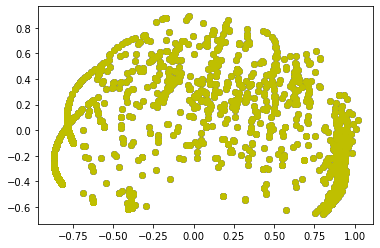

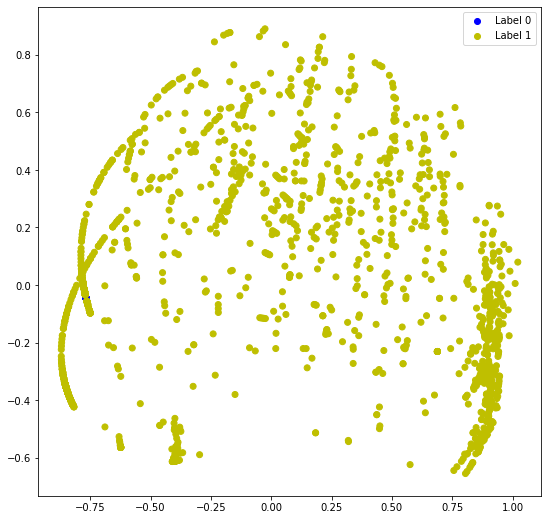

In [7]:
# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
  
# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(df_principal)

# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_nn]
  
# Plotting the clustered scatter plot
  
b = plt.scatter(df_principal['P1'], df_principal['P2'], color ='b');
y = plt.scatter(df_principal['P1'], df_principal['P2'], color ='y');
  
plt.figure(figsize =(9, 9))
plt.scatter(df_principal['P1'], df_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [8]:
df_cluster.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer
0,67.0,38.11,0,2,1,1,2,0,2,0,1
1,29.0,0.00,1,2,2,2,2,2,2,2,1
2,22.0,0.00,0,2,2,2,2,2,2,2,1
3,20.0,36.56,0,2,1,1,2,0,2,1,1
4,21.0,0.00,1,2,2,2,2,2,2,2,1
